# Zweifel am Spritverbrauch

Wir stellen uns vor, wir arbeiten als Redakteur für eine Autozeitschrift.

Ein Autohersteller bewirbt sein neues Modell, über das wir berichten wollen, damit, dass es nur 4,5 Liter Benzin auf 100 km verbrauchen soll.

Informationen die wir erhalten haben, legen den Verdacht nahe, dass diese Zahlen geschönt sind. Deshalb beschließen wir eine eigene Testreihe zu starten.


## Modellierung

Wir modellieren den durchschnittlichen Spritverbrauch $\mu$ als Zufallsvariable die normalverteilt ist, $X \sim N(\mu, \sigma)$. Aus langjähriges Erfahrung wissen wir, dass die Standardabweichung bei der Feststellung des Spritverbrauchs $\sigma = 0.4$ Liter/100 km beträgt.

Dann ist der durchschnittliche Spritverbrauch von $n$ Testfahrten
$$ \overline{X} = \frac{1}{n}(X+X+\ldots + X) $$
eine normalverteilte Zufallsvariable $X \sim N(\mu, \sigma/\sqrt{n})$.

Die Prüfgröße
$$ PG = \frac{\hat \mu - \mu}{(\sigma/\sqrt{n})} $$
ist eine **standardnormalverteilte Zufallsvariable**, wobei $\hat \mu$ der empirische arithmetische Mittelwert einer Spritverbrauchsmessung vom Umfang $n$ ist.


## Durchführung des Teststatistik

### Formulierung der Hypothesen
Im Zweifel für den Angeklagten, d.h. unsere Hypothesen lauten

$$ H_0: \; \mu \le 4,5 \quad\text{und}\quad H_1: \; \mu > 4,5 $$

### Festlegung der Irrtumswahrscheinlichkeit
Würden wir zu Unrecht behaupten, dass der tatsächliche Spritverbrauch höher als 4,5 ist, muss unser Verlag mit einer Klage des Autoherstellers rechnen. Wir wollen also nur ein kleines Risiko eingehen und wählen die Irrtumswahrscheinlichkeit $\alpha = 1\%$.

Damit ist der Annahme- und Ablehnungsbereich für die Prüfgröße festgelegt:

$$ \text{Annahmebereich} = \{z \;|\; z \le z_{1-\alpha}\}, \quad \text{Ablehnungsbereich} = \{z \;|\; z > z_{1-\alpha}\} $$

Hierbei ist $\Phi(z_{1-\alpha}) = 1-\alpha = 0.99$.

In [5]:
from scipy.stats import norm

z = norm.ppf(0.99)  # Bereichsgrenze, percent point function (inverse of cdf — percentiles).
print('Bereichgrenze = %.03f' % z)

Bereichgrenze = 2.326


In [2]:
%matplotlib inline

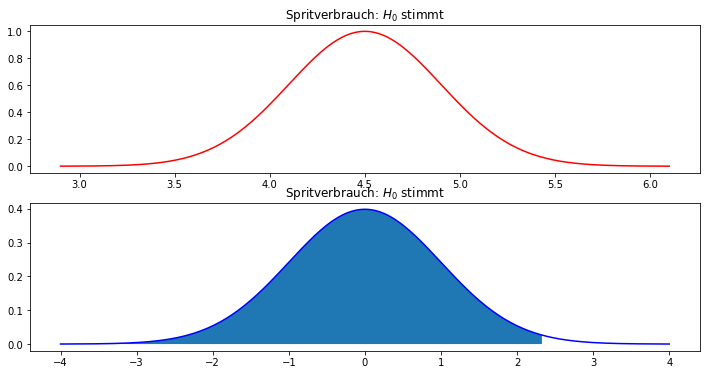

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2,1,figsize=(12,6))

mu, sigma = 0, 1
x = np.linspace(mu-4*sigma,mu+4*sigma,200)
axes[1].plot(x,norm.pdf(x,mu,sigma), 'b-')
x = np.linspace(mu-4*sigma,z,200)
axes[1].fill_between(x, 0, norm.pdf(x,mu,sigma))
axes[1].set_title('Spritverbrauch: $H_0$ stimmt')

mu, sigma = 4.5, 0.4
x = np.linspace(mu-4*sigma,mu+4*sigma,200)
axes[0].plot(x,norm.pdf(x,mu,sigma), 'r-')
axes[0].set_title('Spritverbrauch: $H_0$ stimmt')

plt.show()

## Nur der Hersteller weiß:

Der tatsächliche Spritverbrauch beträgt 5 l/100 km. Die 5-Liter-Marke wurde also nicht geknackt!

Wir sind gespannt, ob die Autozeitschrift diesen Schwindel entlarven kann.

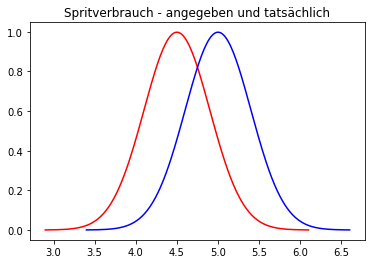

In [4]:
mu_wahr, sigma_wahr = 5.0, 0.4
x2 = x+0.5
plt.plot(x,norm.pdf(x,mu,sigma), 'r-', x2, norm.pdf(x2,mu_wahr,sigma_wahr), 'b-')
plt.title('Spritverbrauch - angegeben und tatsächlich')
plt.show()

### Ziehen einer Stichprobe

Aus Kostengründen bewilligt der Verlag nur $n=10$ Testfahrten um den Spritverbrauch zu messen.

Ist $X_i \sim {\cal N}(\mu, \sigma^2)$, dann ist $\overline{X} = (X_1 + \ldots + X_{10})/n \sim {\cal N}(\mu,\sigma^2/n)$

#### Dies ist die Stichprobe:

In [14]:
import random

#random.seed(4711)
n = 100
stichprobe = [ random.gauss(mu=5, sigma=0.4) for _ in range(n) ]
#print(stichprobe)

In [15]:
# Berechnung der Prüfgröße

PG = (sum(stichprobe)/n - mu) / (sigma/np.sqrt(n))
print('PG = %.02f' % PG)

if PG <= z:
    print('Die Prüfgröße fällt in den Annahmebereich.')
else:
    print('Die Prüfgröße fällt in den Ablehnungsbereich.')

PG = 13.69
Die Prüfgröße fällt in den Ablehnungsbereich.


### Entscheidung

...